In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('data/enrollments.csv')
daily_engagement = read_csv('data/daily_engagement.csv')
project_submissions = read_csv('data/project_submissions.csv')

enrollments[0]


{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [2]:
from datetime import datetime as dt

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [3]:
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

daily_engagement[0]
 

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [4]:
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [5]:

# def unique(id, collection):
    
# #     tmp = {}
#     unique_set = set()
    
#     for item in collection:
#         unique_set.add(item[id])
        
# #         if item[id] not in tmp:
# #             tmp[item[id]] = 1
# #         else:
# #             tmp[item[id]] += 1
    
#     return len(unique_set)

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']

def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

print len(enrollments)
unique_enrolled_students = get_unique_students(enrollments)
print len(unique_enrolled_students)

print len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
print len(unique_engagement_students)

print len(project_submissions)
unique_project_submitters = get_unique_students(project_submissions)
print len(unique_project_submitters)



1640
1302
136240
1237
3642
743


In [6]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [7]:
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print enrollment
        
print num_problem_students      

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


In [8]:
udacity_test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        
len(udacity_test_accounts)

6

In [9]:
def remove_udacity_accounts(data):
    
    non_udacity_data = []
    
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
            
    return non_udacity_data

In [10]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [11]:
paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        paid_students[account_key] = enrollment_date

len(paid_students)


995

In [12]:
print non_udacity_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [13]:
def remove_free_trial_cancels(data):
    
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
            
    return new_data


In [14]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [15]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited']=1
    else:
        engagement_record['has_visited']=0

In [16]:
print paid_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [17]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [18]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
    
print len(paid_engagement_in_first_week) 

6920


In [19]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [20]:
def sum_group_data(grouped_data, field_name):
    
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_group_data(engagement_by_account, 'total_minutes_visited')

In [21]:
import numpy as np

total_minutes = total_minutes_by_account.values()

def describe_data(data):
    print 'Mean ', np.mean(data)
    print 'Standard Deviation ', np.std(data)
    print 'Minimum ', np.min(data)
    print 'Maximum', np.max(data) 

describe_data(total_minutes)



Mean  305.414718908
Standard Deviation  405.91261032
Minimum  0.0
Maximum 3564.7332645


In [22]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        student_with_max_minutes = student
        max_minutes = total_minutes
        
print student_with_max_minutes
print max_minutes

163
3564.7332645


In [23]:
lessons_completed_by_account = sum_group_data(engagement_by_account, 'lessons_completed')

describe_data(lessons_completed_by_account.values())

Mean  1.63216080402
Standard Deviation  3.00140182563
Minimum  0
Maximum 36


In [24]:
days_visited_by_account = sum_group_data(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

Mean  2.91256281407
Standard Deviation  2.22037005491
Minimum  0
Maximum 7


In [25]:
paid_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [26]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and \
            rating == 'PASSED' or rating == 'DISTINCTION':
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

    

648

In [27]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4535
2385


In [28]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

In [29]:
print 'non-passing students:'
non_passing_visits = sum_group_data(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_group_data(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_visits.values())


non-passing students:
Mean  145.504287482
Standard Deviation  269.351677281
Minimum  0.0
Maximum 1768.52274933
passing students:
Mean  391.045767836
Standard Deviation  439.453622872
Minimum  0.0
Maximum 3564.7332645


(array([ 3.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  1.15,  1.3 ,  1.45,  1.6 ,  1.75,  1.9 ,  2.05,  2.2 ,
         2.35,  2.5 ,  2.65,  2.8 ,  2.95,  3.1 ,  3.25,  3.4 ,  3.55,
         3.7 ,  3.85,  4.  ]),
 <a list of 20 Patch objects>)

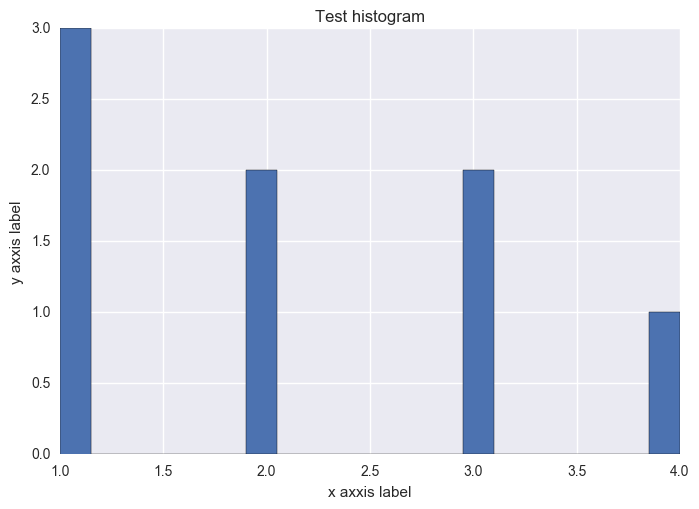

In [30]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Test histogram")
plt.xlabel('x axxis label')
plt.ylabel('y axxis label')
plt.hist(data, bins=20)

(array([ 284.,   33.,    8.,   12.,    2.,    2.,    4.,    2.]),
 array([    0.        ,   221.06534367,   442.13068733,   663.196031  ,
          884.26137467,  1105.32671833,  1326.392062  ,  1547.45740567,
         1768.52274933]),
 <a list of 8 Patch objects>)

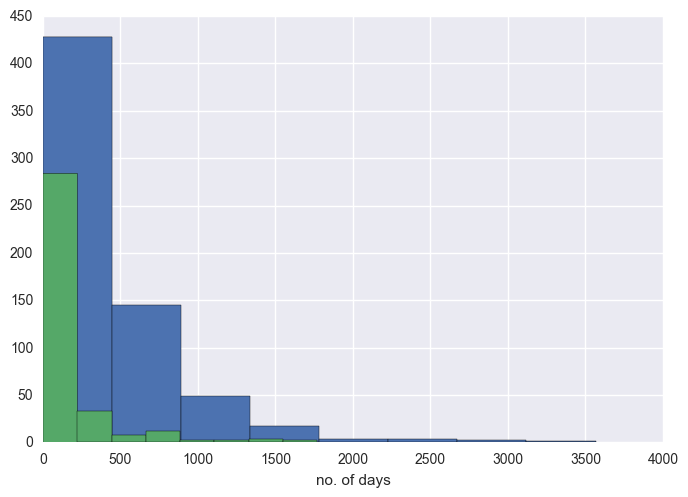

In [31]:
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('no. of days')
plt.hist(non_passing_visits.values(), bins=8)

